<a href="https://colab.research.google.com/github/arjunyash2/arjunyash2.github.io/blob/master/Unistats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import re

In [ ]:
# Define a function to extract the outcode from an address
def extract_outcode(address):
    # Check if the address is a string before attempting to split it
    if isinstance(address, str):
        # Regular expression pattern to find UK outcodes
        pattern = re.compile(r'[A-Z]{1,2}[0-9R][0-9A-Z]?')
        # Search for the pattern at the end of the address string
        match = pattern.search(address.split(',')[-1])
        return match.group() if match else None
    else:
        # If the address is not a string, return None
        return None

In [7]:
def to_csv(df, filename):
  # Save DataFrame to CSV file
  df.to_csv(f'{filename}.csv', index=False)

In [ ]:
# Load the dataset
institution_dataset = pd.read_csv('INSTITUTION.csv')

In [ ]:
institution_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LEGAL_NAME          522 non-null    object 
 1   FIRST_TRADING_NAME  153 non-null    object 
 2   OTHER_NAMES         27 non-null     object 
 3   PROVADDRESS         513 non-null    object 
 4   PROVTEL             516 non-null    object 
 5   PROVURL             463 non-null    object 
 6   PUBUKPRN            522 non-null    int64  
 7   UKPRN               522 non-null    int64  
 8   COUNTRY             522 non-null    object 
 9   PUBUKPRNCOUNTRY     522 non-null    object 
 10  TEFOutcome          522 non-null    object 
 11  APROutcome          0 non-null      float64
 12  SUURL               500 non-null    object 
 13  SUURLW              20 non-null     object 
dtypes: float64(1), int64(2), object(11)
memory usage: 57.2+ KB


In [ ]:
institution_dataset.describe()

In [ ]:
institution_dataset.head()

In [ ]:
institution_dataset['PROVADDRESS']

0      Godmersham Park House, Godmersham Park, Godmer...
1          Wootton Road, Abingdon, Oxfordshire, OX14 1GG
2          Wootton Road, Abingdon, Oxfordshire, OX14 1GG
3      Heath Mill Studios, 68 Heath Mill Lane, Birmin...
4             13-15, Parkwood Road, Bournemouth, BH5 2DF
                             ...                        
517                2 Callaghan Square, Cardiff, CF10 5BT
518    Harper Adams University, Working In Collaborat...
519    The Universities Of Greenwich And Kent At Medw...
520       University Of York, Heslington, York, YO10 5DD
521    Bsms Teaching Building, University Of Sussex, ...
Name: PROVADDRESS, Length: 522, dtype: object

In [ ]:
# Apply the function to the PROVADDRESS column
institution_dataset['OUTCODE'] = institution_dataset['PROVADDRESS'].apply(extract_outcode)

In [ ]:
institution_dataset.head()

In [ ]:
institution_dataset=institution_dataset.drop(columns=["FIRST_TRADING_NAME", "OTHER_NAMES", "TEFOutcome", "APROutcome", "SUURLW", "PROVTEL", "PROVURL", "PUBUKPRNCOUNTRY", "SUURL", "PUBUKPRN"])

In [ ]:
institution_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LEGAL_NAME   522 non-null    object
 1   PROVADDRESS  513 non-null    object
 2   UKPRN        522 non-null    int64 
 3   COUNTRY      522 non-null    object
 4   OUTCODE      512 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.5+ KB


In [ ]:
# Function to find UK postcodes in a string
def find_postcode(address):
    if isinstance(address, str):
        postcode_regex = r"[A-Za-z]{1,2}[0-9Rr][0-9A-Za-z]? ?[0-9][ABD-HJLNP-UW-Zabd-hjlnp-uw-z]{2}"
        postcode_search = re.search(postcode_regex, address)
        if postcode_search:
            return postcode_search.group()
    return None

In [ ]:
# Apply the function to the 'PROVADDRESS' column to extract postcodes
institution_dataset['POSTCODE'] = institution_dataset['PROVADDRESS'].apply(find_postcode)

# Display the first few rows of the dataset with the new 'POSTCODE' column
institution_dataset.head()

,LEGAL_NAME,PROVADDRESS,UKPRN,COUNTRY,OUTCODE,POSTCODE
0,Association of British Dispensing Opticians(The),"Godmersham Park House, Godmersham Park, Godmer...",10001143,XF,CT4,CT4 7DT
1,Abingdon and Witney College,"Wootton Road, Abingdon, Oxfordshire, OX14 1GG",10000055,XF,OX14,OX14 1GG
2,Abingdon and Witney College,"Wootton Road, Abingdon, Oxfordshire, OX14 1GG",10004930,XF,OX14,OX14 1GG
3,Access To Music Limited,"Heath Mill Studios, 68 Heath Mill Lane, Birmin...",10004797,XF,B9,B9 4AR
4,Aecc University College,"13-15, Parkwood Road, Bournemouth, BH5 2DF",10000163,XF,BH5,BH5 2DF


In [ ]:
to_csv(institution_dataset, "institution_modified")

In [ ]:
 institution_dataset.head()

In [ ]:
water_data = pd.read_csv("data-water.csv")

In [ ]:
water_data.head()

In [ ]:
# Merge the two DataFrames on the 'UKPRN' column
merged_df = pd.merge(institution_dataset, water_data, on='UKPRN')

In [ ]:
merged_df

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422326 entries, 0 to 422325
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   LEGAL_NAME              422326 non-null  object
 1   PROVADDRESS             417594 non-null  object
 2   PUBUKPRN                422326 non-null  int64 
 3   UKPRN                   422326 non-null  int64 
 4   COUNTRY                 422326 non-null  object
 5   PUBUKPRNCOUNTRY         422326 non-null  object
 6   SUURL                   410741 non-null  object
 7   OUTCODE                 417594 non-null  object
 8   HE Provider             422326 non-null  object
 9   Academic Year           422326 non-null  object
 10  Country of HE provider  422326 non-null  object
 11  Region of HE provider   422326 non-null  object
 12  Table                   422326 non-null  object
 13  Category marker         422326 non-null  object
 14  Category                422326 non-n

In [ ]:
to_csv(merged_df, "water_consumption")

In [ ]:
loc_data = pd.read_csv("LOCATION.csv")

In [ ]:
loc_data.head()

In [ ]:
loc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UKPRN       967 non-null    int64  
 1   ACCOMURL    939 non-null    object 
 2   ACCOMURLW   42 non-null     object 
 3   LOCID       967 non-null    object 
 4   LOCNAME     967 non-null    object 
 5   LOCNAMEW    62 non-null     object 
 6   LATITUDE    967 non-null    float64
 7   LONGITUDE   967 non-null    float64
 8   LOCUKPRN    704 non-null    float64
 9   LOCCOUNTRY  967 non-null    object 
 10  SUURL       948 non-null    object 
 11  SUURLW      47 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 90.8+ KB


In [ ]:
loc_data=loc_data.drop(columns=["LOCUKPRN", "LOCCOUNTRY","SUURL", "SUURLW", "LOCNAMEW", "LOCNAME", "LOCID","ACCOMURLW", "ACCOMURL"])

In [ ]:
loc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UKPRN      967 non-null    int64  
 1   LATITUDE   967 non-null    float64
 2   LONGITUDE  967 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.8 KB


In [ ]:
merged_df_uni = pd.merge(institution_dataset, loc_data, on='UKPRN', how="left")

In [ ]:
merged_df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2267 entries, 0 to 2266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEGAL_NAME   2267 non-null   object 
 1   PROVADDRESS  2242 non-null   object 
 2   UKPRN        2267 non-null   int64  
 3   COUNTRY      2267 non-null   object 
 4   OUTCODE      2237 non-null   object 
 5   LATITUDE     2262 non-null   float64
 6   LONGITUDE    2262 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 141.7+ KB


In [ ]:
df = merged_df_uni.dropna(subset=['LONGITUDE'])

In [ ]:
all_not_null = df['LONGITUDE'].notnull().all()

In [ ]:
all_not_null

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 0 to 2266
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LEGAL_NAME   2262 non-null   object 
 1   PROVADDRESS  2237 non-null   object 
 2   UKPRN        2262 non-null   int64  
 3   COUNTRY      2262 non-null   object 
 4   OUTCODE      2232 non-null   object 
 5   LATITUDE     2262 non-null   float64
 6   LONGITUDE    2262 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 141.4+ KB


In [ ]:
to_csv(df, "Uni_loc")

In [ ]:
merged_df_loc

In [ ]:
merged_df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929373 entries, 0 to 2929372
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   LEGAL_NAME              object 
 1   PROVADDRESS             object 
 2   PUBUKPRN                int64  
 3   UKPRN                   int64  
 4   COUNTRY                 object 
 5   PUBUKPRNCOUNTRY         object 
 6   SUURL_x                 object 
 7   OUTCODE                 object 
 8   HE Provider             object 
 9   Academic Year           object 
 10  Country of HE provider  object 
 11  Region of HE provider   object 
 12  Table                   object 
 13  Category marker         object 
 14  Category                object 
 15  Value                   object 
 16  ACCOMURL                object 
 17  ACCOMURLW               object 
 18  LOCID                   object 
 19  LOCNAME                 object 
 20  LOCNAMEW                object 
 21  LATITUDE                float64

In [ ]:
merged_df_loc=merged_df_loc.drop(columns=["LOCUKPRN", "LOCCOUNTRY", "SUURL_y", "SUURLW", "LOCNAMEW", "LOCNAME", "LOCID","ACCOMURLW", "ACCOMURL","PUBUKPRNCOUNTRY", "Country of HE provider", "Region of HE provider", "SUURL_x" ])

In [ ]:
to_csv(merged_df_loc, "Utility Consumption")

### Post Code


In [ ]:
pcd_dataset = pd.read_csv('/content/drive/My Drive/Dissertation/PCD_OA_LSOA_MSOA_LAD_AUG22_UK_LU.csv', encoding='latin-1')

<ipython-input-5-fdb075085de9>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pcd_dataset = pd.read_csv('/content/drive/My Drive/Dissertation/PCD_OA_LSOA_MSOA_LAD_AUG22_UK_LU.csv', encoding='latin-1')


In [ ]:
# Apply the function to the PROVADDRESS column
pcd_dataset['OUTCODE'] = pcd_dataset['pcd8'].apply(extract_outcode)

In [ ]:
pcd_dataset.head()

,pcd7,pcd8,pcds,dointr,doterm,usertype,oa11cd,lsoa11cd,msoa11cd,ladcd,lsoa11nm,msoa11nm,ladnm,ladnmw,OUTCODE
0,AB1 0AA,AB1 0AA,AB1 0AA,198001,199606.0,0,S00090303,S01006514,S02001237,S12000033,"Cults, Bieldside and Milltimber West - 02","Cults, Bieldside and Milltimber West",Aberdeen City,NaN,AB1
1,AB1 0AB,AB1 0AB,AB1 0AB,198001,199606.0,0,S00090303,S01006514,S02001237,S12000033,"Cults, Bieldside and Milltimber West - 02","Cults, Bieldside and Milltimber West",Aberdeen City,NaN,AB1
2,AB1 0AD,AB1 0AD,AB1 0AD,198001,199606.0,0,S00090399,S01006514,S02001237,S12000033,"Cults, Bieldside and Milltimber West - 02","Cults, Bieldside and Milltimber West",Aberdeen City,NaN,AB1
3,AB1 0AE,AB1 0AE,AB1 0AE,199402,199606.0,0,S00091322,S01006853,S02001296,S12000034,"Dunecht, Durris and Drumoak - 01","Dunecht, Durris and Drumoak",Aberdeenshire,NaN,AB1
4,AB1 0AF,AB1 0AF,AB1 0AF,199012,199207.0,1,S00090299,S01006511,S02001236,S12000033,Culter - 06,Culter,Aberdeen City,NaN,AB1


In [ ]:
pcd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680064 entries, 0 to 2680063
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   pcd7      object 
 1   pcd8      object 
 2   pcds      object 
 3   dointr    int64  
 4   doterm    float64
 5   usertype  int64  
 6   oa11cd    object 
 7   lsoa11cd  object 
 8   msoa11cd  object 
 9   ladcd     object 
 10  lsoa11nm  object 
 11  msoa11nm  object 
 12  ladnm     object 
 13  ladnmw    object 
 14  OUTCODE   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 306.7+ MB


In [ ]:
pcd_dataset=pcd_dataset[["OUTCODE", "ladnm", "pcd7", "pcd8", "lsoa11cd", "ladcd", "msoa11cd", "oa11cd"]]

In [ ]:
to_csv(pcd_dataset, "pcd_mapper")

In [ ]:
!cp -r '/content/pcd_mapper.csv' '/content/drive/My Drive/Dissertation/pcd_mapper.csv'

In [ ]:
pcd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680064 entries, 0 to 2680063
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   OUTCODE   object
 1   ladnm     object
 2   pcd7      object
 3   pcd8      object
 4   lsoa11cd  object
 5   ladcd     object
 6   msoa11cd  object
 7   oa11cd    object
dtypes: object(8)
memory usage: 163.6+ MB


In [4]:
!pip install geopandas pandas matplotlib

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
pcd_mapper = pd.read_csv('/content/drive/My Drive/Dissertation/pcd_mapper.csv')
water_consumption = pd.read_csv('/content/drive/My Drive/Dissertation/water_consumption.csv')
uk_gdf = gpd.read_file('/content/drive/My Drive/Dissertation/Local_Authority_Districts__May_2020__Boundaries_UK_BFE.shp')

In [2]:
# Load the shapefile into a GeoDataFrame
gdf_new_boundaries = uk_gdf
# Display the columns of the GeoDataFrame
print(gdf_new_boundaries.columns)

Index(['objectid_1', 'lad20cd', 'lad20nm', 'lad20nmw', 'bng_e', 'bng_n',
       'long', 'lat', 'st_areasha', 'st_lengths', 'GlobalID', 'geometry'],
      dtype='object')


In [ ]:
# Extract unique values from the lad20nm column
unique_regions = gdf_new_boundaries['lad20nm'].unique()

# Print the unique regions
print(unique_regions)

In [16]:
import os

In [32]:
def to_csv_utility(df, filename, year):
  # Save DataFrame to CSV file
  df.to_csv(f"{filename}_{year}.csv", index=False)

In [ ]:
# Filter the water consumption dataset
unique_academic_years  = water_consumption['Academic Year'].unique()


In [36]:

for academic_year in unique_academic_years:

    # Filter the dataset based on the specified criteria
    filtered_wc = water_consumption.query(
        f"`Category marker` == 'Water consumption' and `Category` == 'Residential (m3)' and `Academic Year` == '{academic_year}' and `Country of HE provider` == 'England'"
    ).copy()  # Create a copy of the filtered data

    # Convert the 'Value' column to numeric and handle errors by setting them to NaN
    filtered_wc['Value'] = pd.to_numeric(filtered_wc['Value'], errors='coerce')

    # Merge the filtered dataset with the PCD Mapper dataset
    merged_data = filtered_wc.merge(pcd_mapper[['OUTCODE', 'ladcd', 'ladnm']], on='OUTCODE', how='left')

    # Group by local authority district and sum the water consumption
    grouped_wc = merged_data.groupby('ladcd')['Value'].sum().reset_index()

    # Replace the forward slash in the academic_year with an underscore
    cleaned_academic_year = academic_year.replace('/', '_')

    # Save the file with the specified name
    file_name = f"water_consumption_{cleaned_academic_year}.csv"
    current_dir = os.getcwd()
    full_path = os.path.join(current_dir, file_name)

    print(f"Current working directory: {current_dir}")
    print(f"Full path to save the file: {full_path}")

    try:
        grouped_wc.to_csv(full_path, index=False)
        print(f"File {file_name} saved successfully.")
    except Exception as e:
        print(f"Failed to save the file: {e}")

Current working directory: /content
Full path to save the file: /content/water_consumption_2021_22.csv
File water_consumption_2021_22.csv saved successfully.
Current working directory: /content
Full path to save the file: /content/water_consumption_2020_21.csv
File water_consumption_2020_21.csv saved successfully.
Current working directory: /content
Full path to save the file: /content/water_consumption_2018_19.csv
File water_consumption_2018_19.csv saved successfully.
Current working directory: /content
Full path to save the file: /content/water_consumption_2017_18.csv
File water_consumption_2017_18.csv saved successfully.
Current working directory: /content
Full path to save the file: /content/water_consumption_2016_17.csv
File water_consumption_2016_17.csv saved successfully.
Current working directory: /content
Full path to save the file: /content/water_consumption_2015_16.csv
File water_consumption_2015_16.csv saved successfully.
Current working directory: /content
Full path to sav

In [8]:
to_csv(grouped_wc, 'water_consumption')

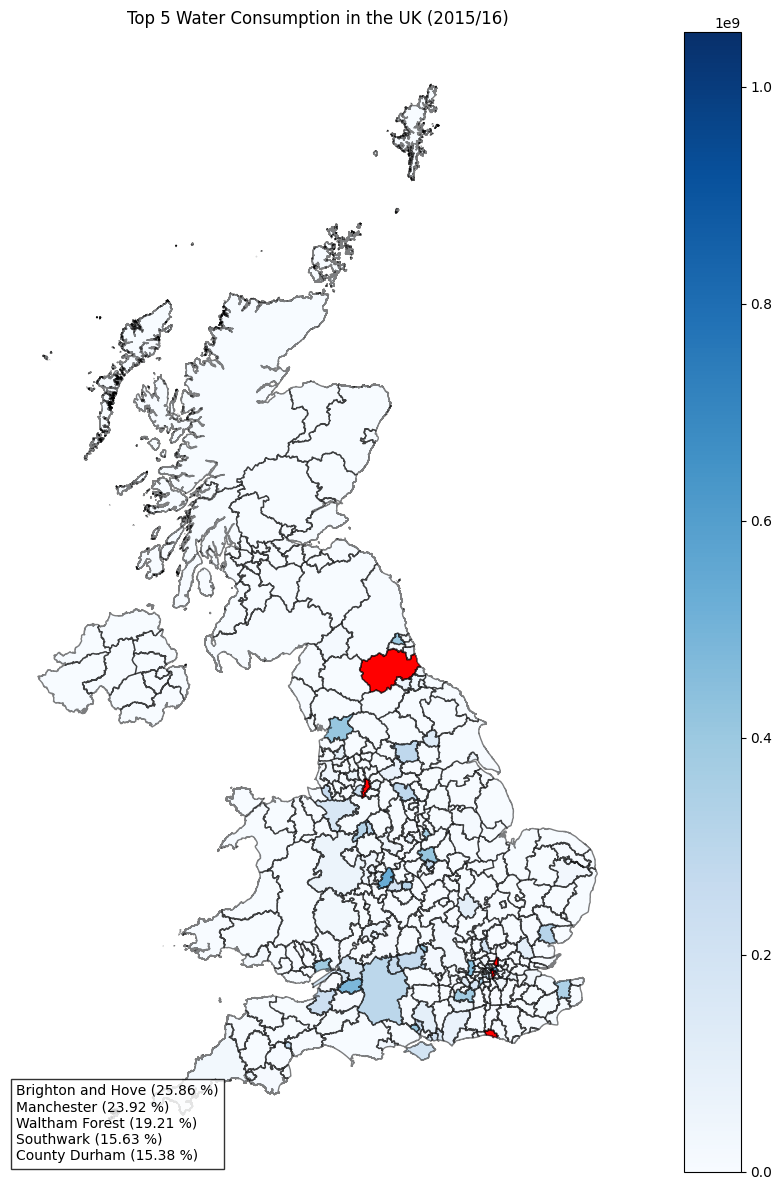

In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


for academic_year in unique_academic_years

# Load the water consumption data grouped by local authority district
water_data_grp = pd.read_csv("water_consumption.csv")

# Merge the summed water consumption with the shapefile
merged_gdf = uk_gdf.merge(water_data_grp, left_on='lad20cd', right_on='ladcd', how='left')

# Handle missing or infinite values in the 'Value' column
merged_gdf['Value'] = merged_gdf['Value'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Rank the places by water consumption
high_consumption_gdf = merged_gdf.copy()
high_consumption_gdf['Rank'] = high_consumption_gdf['Value'].rank(ascending=False, method='min').astype(int)

# Filter the top 5 ranks
top_5_gdf = high_consumption_gdf[high_consumption_gdf['Rank'] <= 5]

# Calculate the combined consumption for the top 5 areas
combined_top_5_consumption = top_5_gdf['Value'].sum()

# Adjust the percentage of total water consumption for each top 5 area relative to their combined consumption
top_5_gdf['Adjusted_Percentage'] = (top_5_gdf['Value'] / combined_top_5_consumption * 100).round(2)

# Plot the map with red color for the top 5 places with higher consumption
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.boundary.plot(ax=ax, linewidth=1, color='black', alpha=0.5)
merged_gdf.plot(column='Value', cmap='Blues', legend=True, ax=ax)

# Highlight the top 5 places with red color
top_5_gdf.plot(ax=ax, color='red')

# Create a legend with the local authority district name and adjusted percentage of total water consumption
legend_labels = top_5_gdf[['Rank', 'lad20nm', 'Adjusted_Percentage']].sort_values('Rank')
legend_text = '\n'.join([f"{name} ({percentage} %)" for name, percentage in zip(legend_labels['lad20nm'], legend_labels['Adjusted_Percentage'])])
ax.text(0.01, 0.01, legend_text, fontsize=10, ha='left', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))

ax.set_title('Top 5 Water Consumption in the UK (2015/16)')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ladcd   213 non-null    object 
 1   Value   213 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
uk_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_0        192 non-null    int64   
 1   ISO         192 non-null    object  
 2   NAME_0      192 non-null    object  
 3   ID_1        192 non-null    int64   
 4   NAME_1      192 non-null    object  
 5   ID_2        192 non-null    int64   
 6   NAME_2      192 non-null    object  
 7   VARNAME_2   35 non-null     object  
 8   NL_NAME_2   0 non-null      float64 
 9   HASC_2      192 non-null    object  
 10  CC_2        0 non-null      float64 
 11  TYPE_2      192 non-null    object  
 12  ENGTYPE_2   192 non-null    object  
 13  VALIDFR_2   159 non-null    object  
 14  VALIDTO_2   192 non-null    object  
 15  REMARKS_2   1 non-null      object  
 16  Shape_Leng  192 non-null    float64 
 17  Shape_Area  192 non-null    float64 
 18  geometry    192 non-null    geometry
dtype

In [ ]:
imd_dataset = pd.read_csv('imd2019lsoa.csv')

In [ ]:
imd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985320 entries, 0 to 985319
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FeatureCode             985320 non-null  object 
 1   DateCode                985320 non-null  int64  
 2   Measurement             985320 non-null  object 
 3   Units                   0 non-null       float64
 4   Value                   985320 non-null  float64
 5   Indices of Deprivation  985320 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 45.1+ MB


### Marks

In [ ]:
# Load the dataset
ins_dataset = pd.read_csv('/content/My Drive/Dissertation/institution_grades.csv')

NameError: ignored

In [ ]:
first_degree = pd.read_csv('table-16.csv')

In [ ]:
first_degree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164160 entries, 0 to 164159
Data columns (total 8 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   UKPRN                                         159752 non-null  float64
 1   HE provider                                   164160 non-null  object 
 2   Country of HE provider                        164160 non-null  object 
 3   Region of HE provider                         164160 non-null  object 
 4   Academic Year                                 164160 non-null  object 
 5   Qualification/Classification marker           164160 non-null  object 
 6   Level of qualification/Degree classification  164160 non-null  object 
 7   Number                                        164160 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 10.0+ MB


In [ ]:
ins_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LEGAL_NAME       523 non-null    object
 1   PROVADDRESS      514 non-null    object
 2   PUBUKPRN         523 non-null    int64 
 3   UKPRN            523 non-null    int64 
 4   COUNTRY          523 non-null    object
 5   PUBUKPRNCOUNTRY  523 non-null    object
 6   SUURL            501 non-null    object
 7   OUTCODE          513 non-null    object
dtypes: int64(2), object(6)
memory usage: 32.8+ KB


In [ ]:
# Merge the two DataFrames on the 'UKPRN' column
merged_df = pd.merge(first_degree, ins_dataset, on='UKPRN')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208924 entries, 0 to 208923
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   UKPRN                                         208924 non-null  float64
 1   HE provider                                   208924 non-null  object 
 2   Country of HE provider                        208924 non-null  object 
 3   Region of HE provider                         208924 non-null  object 
 4   Academic Year                                 208924 non-null  object 
 5   Qualification/Classification marker           208924 non-null  object 
 6   Level of qualification/Degree classification  208924 non-null  object 
 7   Number                                        208924 non-null  int64  
 8   LEGAL_NAME                                    208924 non-null  object 
 9   PROVADDRESS                                   20

In [ ]:
merged_df = merged_df.drop(columns=['SUURL', 'PUBUKPRNCOUNTRY', 'COUNTRY', 'PUBUKPRN', 'PROVADDRESS', 'LEGAL_NAME'])

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208924 entries, 0 to 208923
Data columns (total 9 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   UKPRN                                         208924 non-null  float64
 1   HE provider                                   208924 non-null  object 
 2   Country of HE provider                        208924 non-null  object 
 3   Region of HE provider                         208924 non-null  object 
 4   Academic Year                                 208924 non-null  object 
 5   Qualification/Classification marker           208924 non-null  object 
 6   Level of qualification/Degree classification  208924 non-null  object 
 7   Number                                        208924 non-null  int64  
 8   OUTCODE                                       205200 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 

In [ ]:
to_csv(merged_df, "institution_grades")